# Convergence

In [15]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from loss_functions import SpectrumDistance
from optimization import ModelQuantumMap, Logger
from quantum_channel import ReplacementChannel, channel_fidelity
from kraus_channels import DilutedKrausMap, KrausMap
from quantum_tools import generate_unitary, circuit_to_matrix
from spectrum import channel_spectrum, mean_spacing
from quantum_circuits import pqc_basic
from utils import loader
from experimental import generate_pauli_circuits
from lindblad_channels import CompactLindbladMap

np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

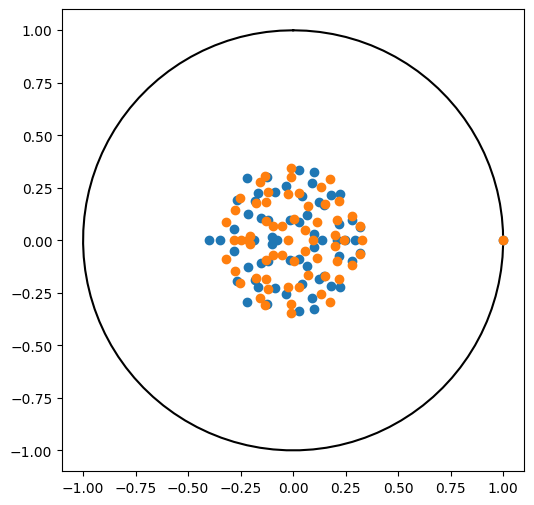

In [24]:
n = 3
d = 2**n
np.random.seed(43)
tf.random.set_seed(43)


channel_target = KrausMap(d=d,
                          rank = d)
spectrum_target = channel_spectrum(channel_target)

channel_model = KrausMap(d=d,
                          rank = d)
spectrum_model = channel_spectrum(channel_model)


t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
fig = plt.figure(figsize=(6,6), dpi = 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum_model[:,0], spectrum_model[:,1], "o")
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")

sigma = 2*mean_spacing(spectrum_model)


model = ModelQuantumMap(channel = channel_model,
                        loss_function = SpectrumDistance(sigma=sigma, k=10000, remove_shift=False),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = SpectrumDistance(sigma=sigma, k=10000), 
                                        N=0,
                                        sample_freq=100)
                        )

In [25]:
model.train(inputs = None,
            targets = [spectrum_target],
            num_iter = 3000,
            N = 0,
            )

  0%|          | 0/3000 [00:00<?, ?it/s]

-0.26619927803600085 None
-0.27118053073080006 None
-0.27117224300585074 None
-0.27115985645377616 None
-0.2711441943942487 None
-0.27112868673280865 None
-0.27111298185814736 None
-0.2710959236563621 None
-0.2710804828867539 None
-0.2710643598098051 None
-0.27104761750602685 None
-0.2710327121709592 None
-0.27101118659785056 None
-0.2710002163262897 None
-0.2709828285219324 None
-0.27096747187066544 None
-0.2709511573535093 None
-0.27093414762169354 None
-0.27091847632406596 None
-0.2709021018658036 None
-0.2708857768989243 None
-0.27086915323857 None
-0.27085269702062664 None
-0.27083166001312525 None
-0.2708181722718789 None
-0.27080412699797113 None
-0.2707878061119285 None
-0.2707714056221219 None
-0.27075511831850624 None
-0.2707385081764083 None
-0.2707224386409211 None


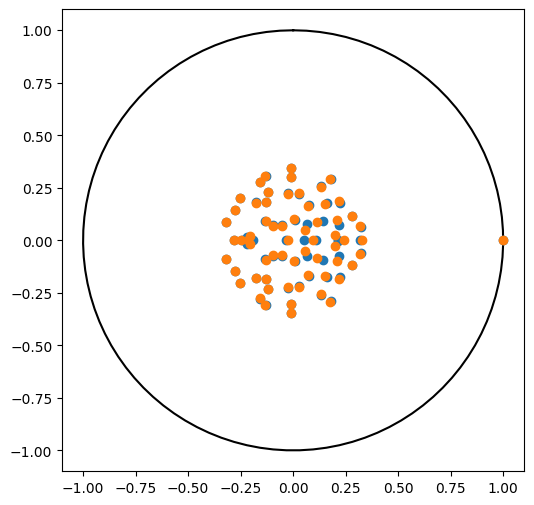

In [26]:
spectrum_target = channel_spectrum(channel_target)
spectrum_model = channel_spectrum(channel_model)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
fig = plt.figure(figsize=(6,6), dpi = 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "o")
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")

In [27]:
model = ModelQuantumMap(channel = channel_model,
                        loss_function = SpectrumDistance(sigma=sigma, k=10000, mode="pairwise"),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = SpectrumDistance(sigma=sigma, k=10000, mode="pairwise"), 
                                        N=0,
                                        sample_freq=20)
                        )

In [31]:
model.train(inputs = None,
            targets = [spectrum_target],
            num_iter = 100,
            N = 0,
            )

  0%|          | 0/100 [00:00<?, ?it/s]

0.00020086842667506644 None
3.204188915421342e-05 None
4.085185017052341e-06 None


KeyboardInterrupt: 

c:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


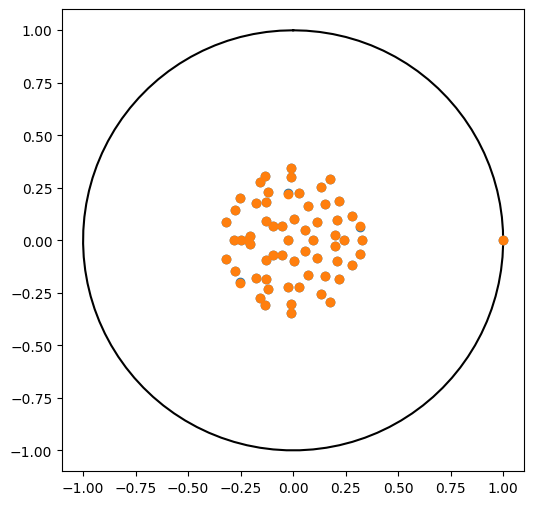

In [32]:
spectrum_target = channel_spectrum(channel_target)
spectrum_model = channel_spectrum(channel_model)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]
fig = plt.figure(figsize=(6,6), dpi = 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "o")
plt.plot(spectrum_target[:,0], spectrum_target[:,1], "o")

In [34]:
channel_fidelity(channel_target, channel_model)

<tf.Tensor: shape=(), dtype=float64, numpy=0.10142875069334639>